# <font color=blue>Assignments for "Data Cleaning - Outliers"</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import zscore
from scipy.stats.mstats import winsorize

%matplotlib inline

In this assignment, you continue to study the data of the `US Education System`. Again, please down it from here ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [2]:
df = pd.read_csv('states_all.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


For each column, I will complete the missing value with the mean of that year.

In [3]:
for column in df.columns[3:]:
    for year in df['YEAR'].unique():
        df[column].fillna(df[df['YEAR'] == year][column].mean(), inplace=True)

In [4]:
df.isna().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

**(1)** See `TOTAL_REVENUE`, which includes total revenue data, and `TOTAL_EXPENDITURE`, which includes total spending data. Do these variables contain outliers?

In [5]:
df[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].describe()

,TOTAL_REVENUE,TOTAL_EXPENDITURE
count,1.715000e+03,1.715000e+03
mean,7.940014e+06,8.038215e+06
std,1.032975e+07,1.052905e+07
min,4.656500e+05,4.816650e+05
25%,2.992297e+06,3.004448e+06
50%,4.572764e+06,4.653591e+06
75%,8.165744e+06,8.220253e+06
max,8.921726e+07,8.532013e+07


### Detecting Outliers with Visualization

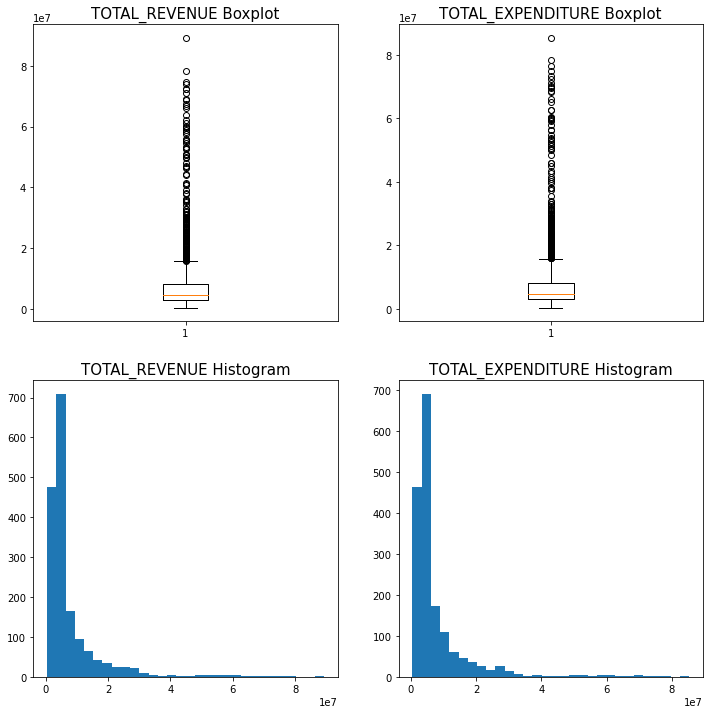

In [6]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.boxplot(df['TOTAL_REVENUE'])
plt.title("TOTAL_REVENUE Boxplot", fontsize=15)

plt.subplot(2, 2, 2)
plt.boxplot(df['TOTAL_EXPENDITURE'])
plt.title("TOTAL_EXPENDITURE Boxplot", fontsize=15)

plt.subplot(2, 2, 3)
plt.hist(df['TOTAL_REVENUE'], bins=30)
plt.title("TOTAL_REVENUE Histogram", fontsize=15)

plt.subplot(2, 2, 4)
plt.hist(df['TOTAL_EXPENDITURE'], bins=30)
plt.title("TOTAL_EXPENDITURE Histogram", fontsize=15)

plt.show()

### Detecting Outliers with Z-Score and Tukey Method

In [7]:
zscores_rev = zscore(df['TOTAL_REVENUE'])
zscores_exp = zscore(df['TOTAL_EXPENDITURE'])

print("Outliers in Total Revenue:")
for threshold in range(1, 5):
    print("Threshold: {}".format(threshold))
    print("Number of Outliers: {}\n".format(len(np.where(zscores_rev > threshold)[0])))
    
print("\nOutliers in Total Expenditure:")
for threshold in range(1, 5):
    print("Threshold: {}".format(threshold))
    print("Number of Outliers: {}\n".format(len(np.where(zscores_exp > threshold)[0])))

Outliers in Total Revenue:
Threshold: 1
Number of Outliers: 165

Threshold: 2
Number of Outliers: 70

Threshold: 3
Number of Outliers: 43

Threshold: 4
Number of Outliers: 33


Outliers in Total Expenditure:
Threshold: 1
Number of Outliers: 161

Threshold: 2
Number of Outliers: 67

Threshold: 3
Number of Outliers: 44

Threshold: 4
Number of Outliers: 35



In [8]:
## For the Tukey Method, I will consider only those values
## that are higher than (q75 + IQR*1.5) and lower than (q25 - IQR*1.5) as outliers.

q75_r, q25_r = np.percentile(df['TOTAL_REVENUE'], [75, 25])
IQR_r = q75_r - q25_r

print("Total Revenue Outliers:",
     len(df[(df['TOTAL_REVENUE'] > (q75_r + (IQR_r * 1.5))) | (df['TOTAL_REVENUE'] < (q25_r - (IQR_r * 1.5)))]))


q75_e, q25_e = np.percentile(df['TOTAL_EXPENDITURE'], [75, 25])
IQR_e = q75_e - q25_e

print("Total Expenditure Outliers:",
     len(df[(df['TOTAL_EXPENDITURE'] > (q75_e + (IQR_e * 1.5))) | (df['TOTAL_EXPENDITURE'] < (q25_e - (IQR_e * 1.5)))]))

Total Revenue Outliers: 195
Total Expenditure Outliers: 195


**(2)** If you find outliers in the total income `TOTAL_REVENUE` and total expenditure `TOTAL_EXPENDITURE` variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

In [9]:
df['TOTAL_REVENUE_WINSORIZED'] = winsorize(df['TOTAL_REVENUE'], limits=(0.15, 0.15))
df['TOTAL_EXPENDITURE_WINSORIZED'] = winsorize(df['TOTAL_EXPENDITURE'], limits=(0.15, 0.15))

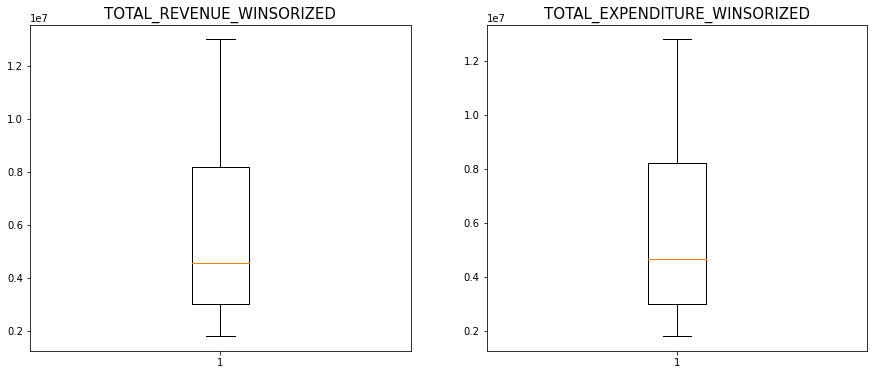

In [10]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['TOTAL_REVENUE_WINSORIZED'])
plt.title('TOTAL_REVENUE_WINSORIZED', fontsize=15)

plt.subplot(1, 2, 2)
plt.boxplot(df['TOTAL_EXPENDITURE_WINSORIZED'])
plt.title('TOTAL_EXPENDITURE_WINSORIZED', fontsize=15)

plt.show()

**(3)** Subtract the total expenditure `TOTAL_EXPENDITURE` from the total income variable `TOTAL_REVENUE` to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

In [11]:
df['BUDGET_DEFICIT'] = df['TOTAL_REVENUE'] - df['TOTAL_EXPENDITURE']

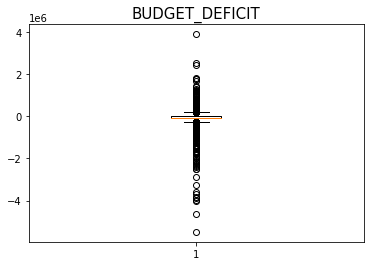

In [12]:
plt.boxplot(df['BUDGET_DEFICIT'])
plt.title("BUDGET_DEFICIT", fontsize=15)
plt.show()

In [13]:
df['BUDGET_DEFICIT_WINSORIZED'] = winsorize(df['BUDGET_DEFICIT'], limits=(0.15, 0.15))

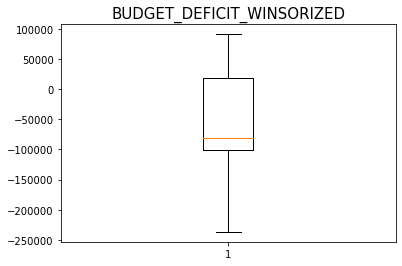

In [14]:
plt.boxplot(df['BUDGET_DEFICIT_WINSORIZED'])
plt.title("BUDGET_DEFICIT_WINSORIZED", fontsize=15)
plt.show()

**(4)** Again create a variable that can be considered as a budget deficit by subtracting the total income `TOTAL_REVENUE` variable from the total expenditure `TOTAL_EXPENDITURE`. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

In [15]:
df['BUDGET_DEFICIT_2'] = df['TOTAL_REVENUE_WINSORIZED'] - df['TOTAL_EXPENDITURE_WINSORIZED']

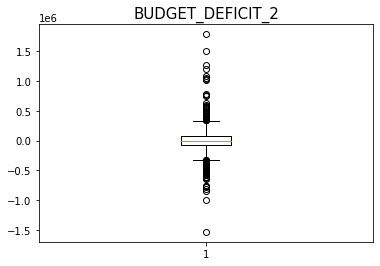

In [16]:
plt.boxplot(df['BUDGET_DEFICIT_2'])
plt.title("BUDGET_DEFICIT_2", fontsize=15)
plt.show()

In [17]:
df['BUDGET_DEFICIT_2_WINSORIZED'] = winsorize(df['BUDGET_DEFICIT_2'], limits=(0.15, 0.15))

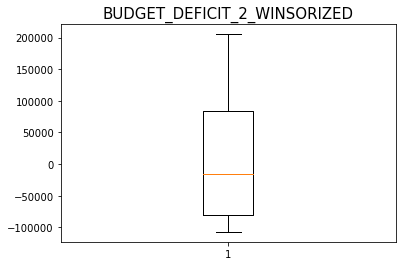

In [18]:
plt.boxplot(df['BUDGET_DEFICIT_2_WINSORIZED'])
plt.title("BUDGET_DEFICIT_2_WINSORIZED", fontsize=15)
plt.show()

**(5)** Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

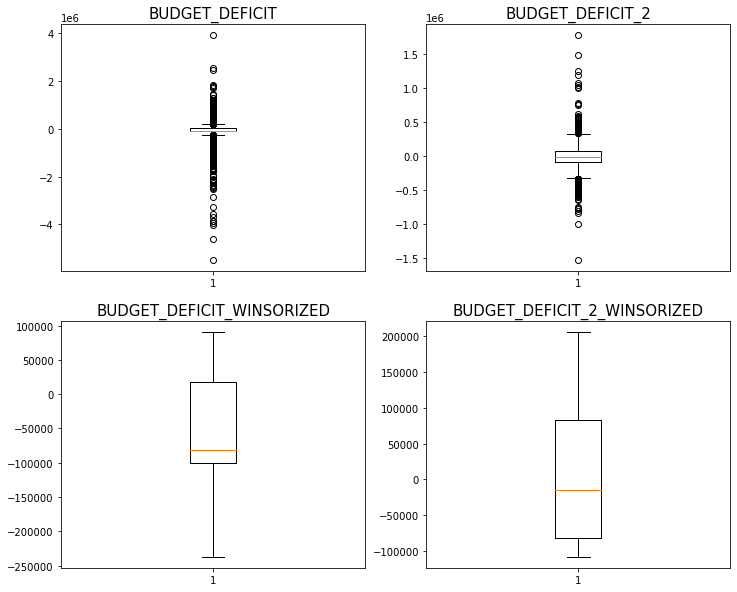

In [19]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.boxplot(df['BUDGET_DEFICIT'])
plt.title("BUDGET_DEFICIT", fontsize=15)

plt.subplot(2, 2, 2)
plt.boxplot(df['BUDGET_DEFICIT_2'])
plt.title("BUDGET_DEFICIT_2", fontsize=15)

plt.subplot(2, 2, 3)
plt.boxplot(df['BUDGET_DEFICIT_WINSORIZED'])
plt.title("BUDGET_DEFICIT_WINSORIZED", fontsize=15)

plt.subplot(2, 2, 4)
plt.boxplot(df['BUDGET_DEFICIT_2_WINSORIZED'])
plt.title("BUDGET_DEFICIT_2_WINSORIZED", fontsize=15)

plt.show()

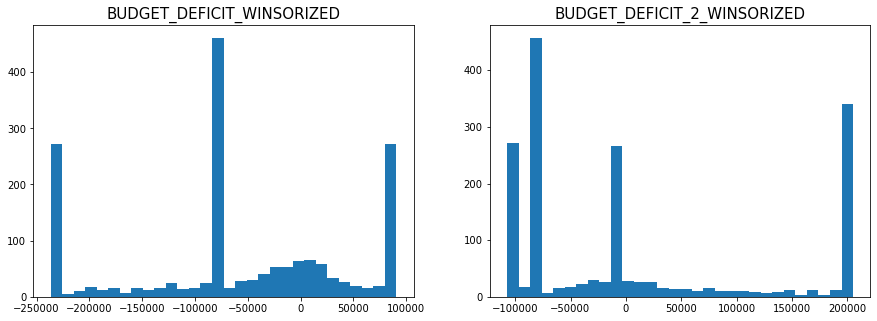

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(df['BUDGET_DEFICIT_WINSORIZED'], bins=30)
plt.title("BUDGET_DEFICIT_WINSORIZED", fontsize=15)

plt.subplot(1, 2, 2)
plt.hist(df['BUDGET_DEFICIT_2_WINSORIZED'], bins=30)
plt.title("BUDGET_DEFICIT_2_WINSORIZED", fontsize=15)

plt.show()

**(6)** If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

I think the second method (creating budget deficit after clearing the outliers from revenue and expenditure data) had a greater effect on the overall data. That is, it changed the distribution more than the first method. Therefore, I think the first method was better in terms of maintaining the overall structure of the original data. But the second method may work better in terms of the models that we are going to build, although I am not sure.